In [1]:
from keras.datasets import imdb

# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Build the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    SimpleRNN(units=32),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)



Epoch 1/10
157/157 [==============================] - 12s 67ms/step - loss: 0.6301 - accuracy: 0.6285 - val_loss: 0.4970 - val_accuracy: 0.7700
Epoch 2/10
157/157 [==============================] - 10s 66ms/step - loss: 0.4114 - accuracy: 0.8256 - val_loss: 0.5860 - val_accuracy: 0.7222
Epoch 3/10
157/157 [==============================] - 10s 65ms/step - loss: 0.3238 - accuracy: 0.8670 - val_loss: 0.4645 - val_accuracy: 0.8068
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.2451 - accuracy: 0.9075 - val_loss: 0.4659 - val_accuracy: 0.7852
Epoch 5/10
157/157 [==============================] - 9s 57ms/step - loss: 0.1875 - accuracy: 0.9312 - val_loss: 0.4391 - val_accuracy: 0.8102
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 0.1328 - accuracy: 0.9538 - val_loss: 0.5282 - val_accuracy: 0.7804
Epoch 7/10
157/157 [==============================] - 11s 71ms/step - loss: 0.0967 - accuracy: 0.9665 - val_loss: 0.4558 - val_accuracy: 

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


782/782 [==============================] - 9s 12ms/step - loss: 0.6128 - accuracy: 0.8283
Test Loss: 0.6128451228141785
Test Accuracy: 0.828279972076416


Epoch 1/10
157/157 [==============================] - 12s 76ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.6441 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 10s 62ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.8045 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 10s 61ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.7025 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.7482 - val_accuracy: 0.8204 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.7931 - val_accuracy: 0.8296 - lr: 2.0000e-04
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.8493 - val_accuracy: 0.8180 - lr: 2.0000e-04
Epoch 7/10
157/157 [==============================

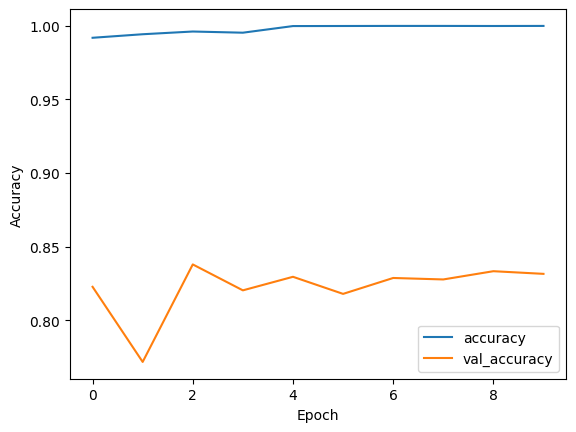

In [14]:
from keras.callbacks import ReduceLROnPlateau

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with callback
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[reduce_lr])

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

